In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")


In [2]:
#reading the data using pandas library
movies= pd.read_csv('IMDB_Movies.csv')
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [3]:
# understanding the columns present in the dataset
movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [4]:
#calculating the number of rows and columns
movies.shape

(5043, 28)

In [5]:
#statistical overview of the data
movies.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [7]:

# Assuming 'df' is your DataFrame
categorical_columns = 0
numerical_columns = 0

for column in movies.columns:
    if movies[column].dtype == 'object':
        categorical_columns += 1
    else:
        numerical_columns += 1

print("Number of categorical columns:", categorical_columns)
print("Number of numerical columns:", numerical_columns)


Number of categorical columns: 13
Number of numerical columns: 15


# A. Cleaning The Data

Cleaning the data: This is one of the most important step to perform before moving forward with the analysis. Use your knowledge learned till now to do this. (Dropping columns, removing null values, etc.) 
Your task: Clean the data

In [8]:
#First we need to check the null values for each column
movies.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          20
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [9]:
#number of null values in each row
movies.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4       13
        ..
5038     4
5039     5
5040     4
5041     2
5042     0
Length: 5043, dtype: int64

In [10]:
# we will see the percentage of null values in each column
round(100*(movies.isnull().sum()/len(movies.index)),2)

color                         0.38
director_name                 2.06
num_critic_for_reviews        0.99
duration                      0.30
director_facebook_likes       2.06
actor_3_facebook_likes        0.46
actor_2_name                  0.26
actor_1_facebook_likes        0.14
gross                        17.53
genres                        0.00
actor_1_name                  0.14
movie_title                   0.00
num_voted_users               0.00
cast_total_facebook_likes     0.00
actor_3_name                  0.46
facenumber_in_poster          0.26
plot_keywords                 3.03
movie_imdb_link               0.00
num_user_for_reviews          0.40
language                      0.24
country                       0.10
content_rating                6.01
budget                        9.76
title_year                    2.14
actor_2_facebook_likes        0.26
imdb_score                    0.00
aspect_ratio                  6.52
movie_facebook_likes          0.00
dtype: float64

In [11]:
#Drop unecessary columns
#For this assignment, we will mostly be analyzing the movies with respect to the ratings, gross collection, popularity of movies, etc. 
#So many of the columns in this dataframe are not required. 
#So it is advised to drop the following columns.
movies=movies.drop(['color','director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','actor_2_name','cast_total_facebook_likes','actor_3_name','duration','facenumber_in_poster','content_rating','country','movie_imdb_link','aspect_ratio','plot_keywords'],axis=1)
round(100*(movies.isnull().sum()/len(movies.index)),2)

director_name              2.06
num_critic_for_reviews     0.99
gross                     17.53
genres                     0.00
actor_1_name               0.14
movie_title                0.00
num_voted_users            0.00
num_user_for_reviews       0.40
language                   0.24
budget                     9.76
title_year                 2.14
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

In [12]:
##Droping unecessary rows using columns with high Null percentages
movies=movies[~np.isnan(movies['gross'])]
movies=movies[~np.isnan(movies['budget'])]

round(100*(movies.isnull().sum()/len(movies.index)),2)

director_name             0.00
num_critic_for_reviews    0.03
gross                     0.00
genres                    0.00
actor_1_name              0.08
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
language                  0.08
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64

# B: Finding the movies with highest profit

1.Create a new column called profit which contains the difference  two columns: gross and budget.

2. Sort the dataframe using the profit column as reference.

3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`.

4. Plot profit (y-axis) vs budget (x- axis) and observe the outliers. using the appropriate chart type.

5. There are as many as 5 outliers in the profit columns.

In [13]:
# Write your code for unit conversion here
movies[['gross','budget']].apply(lambda x:x/1000000)

,gross,budget
0,760.505847,237.0000
1,309.404152,300.0000
2,200.074175,245.0000
3,448.130642,250.0000
5,73.058679,263.7000
...,...,...
5033,0.424760,0.0070
5034,0.070071,0.0070
5035,2.040920,0.0070
5037,0.004584,0.0090


In [14]:
# we are calculating the profit by subtracting budget from gross
movies['profit']=movies['gross'] - movies['budget']
movies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237000000.0,2009.0,7.9,33000,523505847.0
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300000000.0,2007.0,7.1,0,9404152.0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245000000.0,2015.0,6.8,85000,-44925825.0
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250000000.0,2012.0,8.5,164000,198130642.0
5,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,263700000.0,2012.0,6.6,24000,-190641321.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371,English,7000.0,2004.0,7.0,19000,417760.0
5034,Neill Dela Llana,35.0,70071.0,Thriller,Ian Gamazon,Cavite,589,35,English,7000.0,2005.0,6.3,74,63071.0
5035,Robert Rodriguez,56.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130,Spanish,7000.0,1992.0,6.9,0,2033920.0
5037,Edward Burns,14.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14,English,9000.0,2011.0,6.4,413,-4416.0


In [15]:
# Write your code for sorting the dataframe here
movies.sort_values(by='profit',ascending=True)
movies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237000000.0,2009.0,7.9,33000,523505847.0
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300000000.0,2007.0,7.1,0,9404152.0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245000000.0,2015.0,6.8,85000,-44925825.0
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250000000.0,2012.0,8.5,164000,198130642.0
5,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,263700000.0,2012.0,6.6,24000,-190641321.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371,English,7000.0,2004.0,7.0,19000,417760.0
5034,Neill Dela Llana,35.0,70071.0,Thriller,Ian Gamazon,Cavite,589,35,English,7000.0,2005.0,6.3,74,63071.0
5035,Robert Rodriguez,56.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130,Spanish,7000.0,1992.0,6.9,0,2033920.0
5037,Edward Burns,14.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14,English,9000.0,2011.0,6.4,413,-4416.0


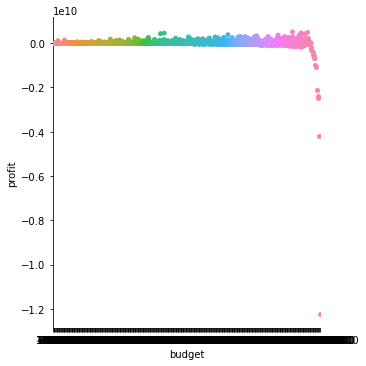

In [16]:
sns.catplot(data=movies, x='budget', y='profit')

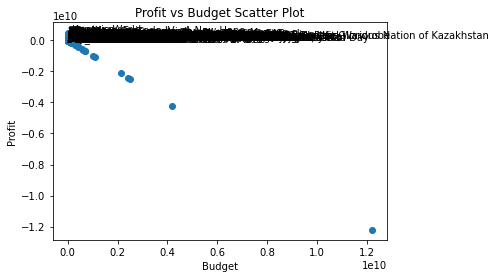

In [17]:
import matplotlib.pyplot as plt

# Plotting profit vs budget as a scatter plot
plt.scatter(movies['budget'], movies['profit'])

# Adding labels and title
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.title('Profit vs Budget Scatter Plot')

# Identifying outliers
outliers = movies[movies['profit'] > 5]  # Assuming outliers have profit greater than 5 (adjust as needed)
for index, row in outliers.iterrows():
    plt.annotate(row['movie_title'], (row['budget'], row['profit']))

# Displaying the plot
plt.show()


In [18]:
movie=movies.sort_values(by=['profit'],ascending=False)
movie.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237000000.0,2009.0,7.9,33000,523505847.0
29,Colin Trevorrow,644.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,150000000.0,2015.0,7.0,150000,502177271.0
26,James Cameron,315.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,200000000.0,1997.0,7.7,26000,458672302.0
3024,George Lucas,282.0,460935665.0,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,11000000.0,1977.0,8.7,33000,449935665.0
3080,Steven Spielberg,215.0,434949459.0,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,10500000.0,1982.0,7.9,34000,424449459.0


In [19]:
top10=movie[['movie_title']][0:10]  # CreatingNew Dataframe
top10

,movie_title
0,Avatar
29,Jurassic World
26,Titanic
3024,Star Wars: Episode IV - A New Hope
3080,E.T. the Extra-Terrestrial
794,The Avengers
17,The Avengers
509,The Lion King
240,Star Wars: Episode I - The Phantom Menace
66,The Dark Knight


In [20]:
#we can see a few duplicates in the top 10 movies list, we are going to drop them.
movies=movies.drop_duplicates()
movies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237000000.0,2009.0,7.9,33000,523505847.0
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300000000.0,2007.0,7.1,0,9404152.0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245000000.0,2015.0,6.8,85000,-44925825.0
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250000000.0,2012.0,8.5,164000,198130642.0
5,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,263700000.0,2012.0,6.6,24000,-190641321.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371,English,7000.0,2004.0,7.0,19000,417760.0
5034,Neill Dela Llana,35.0,70071.0,Thriller,Ian Gamazon,Cavite,589,35,English,7000.0,2005.0,6.3,74,63071.0
5035,Robert Rodriguez,56.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130,Spanish,7000.0,1992.0,6.9,0,2033920.0
5037,Edward Burns,14.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14,English,9000.0,2011.0,6.4,413,-4416.0


In [21]:
#after dropping the duplicates in the dataset we  are calculating the top 10 movies.
movies['profit']=movies['gross']-movies['budget']
movie=movies.sort_values(by=['profit'],ascending=False)
top10=movie[['director_name','movie_title']] #Creating a Dataframe
top10.head(10)

,director_name,movie_title
0,James Cameron,Avatar
29,Colin Trevorrow,Jurassic World
26,James Cameron,Titanic
3024,George Lucas,Star Wars: Episode IV - A New Hope
3080,Steven Spielberg,E.T. the Extra-Terrestrial
17,Joss Whedon,The Avengers
509,Roger Allers,The Lion King
240,George Lucas,Star Wars: Episode I - The Phantom Menace
66,Christopher Nolan,The Dark Knight
439,Gary Ross,The Hunger Games


In [22]:
top10=movie[['movie_title']][0:10]  # CreatingNew Dataframe
top10

,movie_title
0,Avatar
29,Jurassic World
26,Titanic
3024,Star Wars: Episode IV - A New Hope
3080,E.T. the Extra-Terrestrial
17,The Avengers
509,The Lion King
240,Star Wars: Episode I - The Phantom Menace
66,The Dark Knight
439,The Hunger Games


The above are top 10 movies with the highest profit

# C. Find IMDb Top 250

1.Create a new dataframe `IMDb_Top_250` and store the top 250       movies with the highest IMDb Rating (corresponding to the         column:`imdb_score`).

  Also make sure that for all of these movies, the              `num_voted_users` 
is greater than 25,000.

Also add a `Rank` column containing the values 1 to 250 indicating 
the ranks of the corresponding films.

2. Extract all the movies in the `IMDb_Top_250` dataframe which 
are not in the English language and store them in a new dataframe
named `Top_Foreign_Lang_Film`.

In [23]:
# stored top 250 movies with highest imdb rating in new dataframe IMDb_top_250
IMDb_Top_250=movies[['imdb_score','num_voted_users','movie_title','language']]

IMDb_sort= IMDb_Top_250.sort_values(by=['imdb_score'],ascending=False)
IMDb_Top_250=IMDb_sort[IMDb_Top_250.num_voted_users>25000]
IMDb_Top_250.head(250)

,imdb_score,num_voted_users,movie_title,language
1937,9.3,1689764,The Shawshank Redemption,English
3466,9.2,1155770,The Godfather,English
2837,9.0,790926,The Godfather: Part II,English
66,9.0,1676169,The Dark Knight,English
339,8.9,1215718,The Lord of the Rings: The Return of the King,English
...,...,...,...,...
1871,7.9,483756,Taken,English
23,7.9,483540,The Hobbit: The Desolation of Smaug,English
1884,7.9,219008,The Untouchables,English
4640,7.9,44763,"4 Months, 3 Weeks and 2 Days",Romanian


In [24]:
#Rank column containing the values 1 to 250 indicating the ranks of the corresponding films.
IMDb_Top_250["Rank"]=IMDb_Top_250['movie_title'].rank()
IMDb_Top_250['Rank']=IMDb_Top_250['Rank'].sort_values(ascending=True).values
IMDb_Top_250.head()

,imdb_score,num_voted_users,movie_title,language,Rank
1937,9.3,1689764,The Shawshank Redemption,English,1.0
3466,9.2,1155770,The Godfather,English,2.0
2837,9.0,790926,The Godfather: Part II,English,3.0
66,9.0,1676169,The Dark Knight,English,4.0
339,8.9,1215718,The Lord of the Rings: The Return of the King,English,5.0


In [25]:
# Adding a new column 'Rank' ranging from 1 to 251 indicate the ranks of the corresponding films  
IMDb_Top_250 = IMDb_Top_250.set_index("Rank")
IMDb_Top_250.head(250)

,imdb_score,num_voted_users,movie_title,language
Rank,,,,
1.0,9.3,1689764,The Shawshank Redemption,English
2.0,9.2,1155770,The Godfather,English
3.0,9.0,790926,The Godfather: Part II,English
4.0,9.0,1676169,The Dark Knight,English
5.0,8.9,1215718,The Lord of the Rings: The Return of the King,English
...,...,...,...,...
246.0,7.9,483756,Taken,English
247.0,7.9,483540,The Hobbit: The Desolation of Smaug,English
248.0,7.9,219008,The Untouchables,English


In [26]:
# Write your code to extract top foreign language films from 'IMDb_Top_250' here
Top_Foreign_Lang_Film =IMDb_Top_250.loc[(IMDb_Top_250.language != 'English'),:]
Top_Foreign_Lang_Film 

,imdb_score,num_voted_users,movie_title,language
Rank,,,,
8.0,8.9,503509,"The Good, the Bad and the Ugly",Italian
15.0,8.7,229012,Seven Samurai,Japanese
16.0,8.7,533200,City of God,Portuguese
28.0,8.6,417971,Spirited Away,Japanese
34.0,8.5,259379,The Lives of Others,German
...,...,...,...,...
1564.5,6.5,47097,Night Watch,Russian
1619.0,6.4,86152,The Interpreter,Aboriginal
1702.0,6.4,54601,Dead Snow,Norwegian


There are 91 Foreign language movies in top 250 imdb highest rated movies.

# D. Find the best directors

The movies in the dataset are organized by the column labeled 'director_name'. The average IMDb score is calculated for each director, and then the top 10 directors are determined based on their IMDb score. In the case where two directors have the same IMDb score, they are sorted alphabetically by their names.

In [27]:
# Group the 'movies' dataframe by the 'director_name' column
mov = movies.groupby('director_name')

# Calculate the mean IMDb score for each director and sort in descending order
top10director = pd.DataFrame(mov['imdb_score'].mean().sort_values(ascending=False))

# Select only the top 10 directors with the highest average IMDb scores
top10director = top10director.head(10)

# Sort the 'top10director' dataframe based on IMDb score (descending) and director name (ascending)
top10director = top10director.sort_values(['imdb_score', 'director_name'], ascending=(False, True))

# Display the final 'top10director' dataframe
top10director


,imdb_score
director_name,
Charles Chaplin,8.600000
Tony Kaye,8.600000
Alfred Hitchcock,8.500000
Damien Chazelle,8.500000
Majid Majidi,8.500000
Ron Fricke,8.500000
Sergio Leone,8.433333
Christopher Nolan,8.425000
Marius A. Markevicius,8.400000


# E. Popular Genres

In the dataframe, there is a column called genres which contains all the genres of the movies separated by a pipe (|). The first two genres listed in this column are considered to be the most significant for any film.
Here are the steps to follow:
To capture the significance of the first two genres for each movie, extract them and create two new columns called genre_1 and genre_2. If a movie has only one genre listed, then both genre_1 and genre_2 should have the same value.
Next, group the dataframe using genre_1 as the primary column and genre_2 as the secondary column.
Finally, to find out the top 5 most popular genre combinations, calculate the mean of the gross values using the gross column.

In [28]:
# Write your code for extracting the first two genres of each movie here
first=movies['genres'].apply(lambda x: pd.Series(x.split('|')))
movies['genre_1']=first[0]
movies['genre_2']=first[1]
movies.loc[pd.isnull(movies['genre_2']), ['genre_2']] = movies['genre_1']
print(movies.genre_1)

print(movies.genre_2)

0            Action
1            Action
2            Action
3            Action
5            Action
           ...     
5033          Drama
5034       Thriller
5035         Action
5037         Comedy
5042    Documentary
Name: genre_1, Length: 3856, dtype: object
0         Adventure
1         Adventure
2         Adventure
3          Thriller
5         Adventure
           ...     
5033         Sci-Fi
5034       Thriller
5035          Crime
5037          Drama
5042    Documentary
Name: genre_2, Length: 3856, dtype: object


In [29]:
movies_by_segment =movies.groupby(['genre_1','genre_2']) # Write your code for grouping the dataframe here
movies_by_segment

In [30]:
PopGenre =movies_by_segment['gross'].mean().sort_values(ascending=False).head(5) # Write your code for getting the 5 most popular combo of genres here
PopGenre

genre_1    genre_2  
Family     Sci-Fi       4.349495e+08
Adventure  Sci-Fi       2.286278e+08
           Family       1.189195e+08
           Animation    1.169985e+08
Action     Adventure    1.095955e+08
Name: gross, dtype: float64

# F. Charts

1. Create three new dataframes namely, `Meryl_Streep`, `Leo_Caprio`, and `Brad_Pitt` which contain the movies in which the actors: 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' are the lead actors. Use only the `actor_1_name` column for extraction. Also, make sure that you use the names 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' for the said extraction.

2. Append the rows of all these dataframes and store them in a new dataframe named `Combined`.

3. Group the combined dataframe using the `actor_1_name` column.

4. Find the mean of the `num_critic_for_reviews` and `num_user_for_review` and identify the actors which have the highest mean.

A new column named 'decade' should be created to indicate the decade to which each movie belongs. The DataFrame should then be sorted based on this 'decade' column. To determine the total number of user votes for each decade, the DataFrame should be grouped by 'decade' and the sum of the 'users_voted' column should be calculated

In [31]:
Meryl_Streep=movies[['actor_1_name','movie_title','num_critic_for_reviews','num_user_for_reviews']]
Leo_Caprio=movies[['actor_1_name','movie_title','num_critic_for_reviews','num_user_for_reviews']]
Brad_Pitt=movies[['actor_1_name','movie_title','num_critic_for_reviews','num_user_for_reviews']]
Meryl_Streep=Meryl_Streep.loc[Meryl_Streep['actor_1_name']=='Meryl Streep',:]
Meryl_Streep.head()

,actor_1_name,movie_title,num_critic_for_reviews,num_user_for_reviews
410,Meryl Streep,It's Complicated,187.0,214
1106,Meryl Streep,The River Wild,42.0,69
1204,Meryl Streep,Julie & Julia,252.0,277
1408,Meryl Streep,The Devil Wears Prada,208.0,631
1483,Meryl Streep,Lions for Lambs,227.0,298


In [32]:
Leo_Caprio=Leo_Caprio.loc[Leo_Caprio['actor_1_name']=='Leonardo DiCaprio',:]
Leo_Caprio.head()

,actor_1_name,movie_title,num_critic_for_reviews,num_user_for_reviews
26,Leonardo DiCaprio,Titanic,315.0,2528
50,Leonardo DiCaprio,The Great Gatsby,490.0,753
97,Leonardo DiCaprio,Inception,642.0,2803
179,Leonardo DiCaprio,The Revenant,556.0,1188
257,Leonardo DiCaprio,The Aviator,267.0,799


In [33]:
Brad_Pitt=Brad_Pitt.loc[Brad_Pitt['actor_1_name']=='Brad Pitt',:]
Brad_Pitt.head()

,actor_1_name,movie_title,num_critic_for_reviews,num_user_for_reviews
101,Brad Pitt,The Curious Case of Benjamin Button,362.0,822
147,Brad Pitt,Troy,220.0,1694
254,Brad Pitt,Ocean's Twelve,198.0,627
255,Brad Pitt,Mr. & Mrs. Smith,233.0,798
382,Brad Pitt,Spy Game,142.0,361


In [34]:
Combined=Meryl_Streep.append(Leo_Caprio).append(Brad_Pitt)
Combined

,actor_1_name,movie_title,num_critic_for_reviews,num_user_for_reviews
410,Meryl Streep,It's Complicated,187.0,214
1106,Meryl Streep,The River Wild,42.0,69
1204,Meryl Streep,Julie & Julia,252.0,277
1408,Meryl Streep,The Devil Wears Prada,208.0,631
1483,Meryl Streep,Lions for Lambs,227.0,298
1575,Meryl Streep,Out of Africa,66.0,200
1618,Meryl Streep,Hope Springs,234.0,178
1674,Meryl Streep,One True Thing,64.0,112
1925,Meryl Streep,The Hours,174.0,660
2781,Meryl Streep,The Iron Lady,331.0,350


In [35]:
#we are converting the number user for reviews to float 
Combined['num_user_for_reviews'] = Combined['num_user_for_reviews'].astype(float)

In [36]:
#we are grouping based on the actor name we have earlier combined.
Actor_name=Combined.groupby('actor_1_name')
Actor_name

In [37]:
# we are calculating the mean of num critic for reviews for each actor 
Critic_reviews=Actor_name['num_critic_for_reviews'].mean().sort_values(ascending=False)
Critic_reviews

actor_1_name
Leonardo DiCaprio    330.190476
Brad Pitt            245.000000
Meryl Streep         181.454545
Name: num_critic_for_reviews, dtype: float64

In [38]:
# we are calculating the mean of num user for reviews for each actor
Audience_reviews=Actor_name['num_user_for_reviews'].mean().sort_values(ascending=False)
Audience_reviews.head()

actor_1_name
Leonardo DiCaprio    914.476190
Brad Pitt            742.352941
Meryl Streep         297.181818
Name: num_user_for_reviews, dtype: float64

Based on the results we can observe Leonardo Dicaprio have most highest mean value number of critic and audience reviews

In [39]:
movies['decade']=movies['title_year'].apply(lambda x: (x//10) *10).astype(np.int64)
movies['decade']=movies['decade'].astype(str)+'s'
movies=movies.sort_values(['decade'])
movies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,genre_1,genre_2,decade
4812,Harry Beaumont,36.0,2808000.0,Musical|Romance,Anita Page,The Broadway Melody,4546,71,English,379000.0,1929.0,6.3,167,2429000.0,Musical,Romance,1920s
4958,Harry F. Millarde,1.0,3000000.0,Crime|Drama,Stephen Carr,Over the Hill to the Poorhouse,5,1,NaN,100000.0,1920.0,4.8,0,2900000.0,Crime,Drama,1920s
2734,Fritz Lang,260.0,26435.0,Drama|Sci-Fi,Brigitte Helm,Metropolis,111841,413,German,6000000.0,1927.0,8.3,12000,-5973565.0,Drama,Sci-Fi,1920s
4157,Victor Fleming,213.0,22202612.0,Adventure|Family|Fantasy|Musical,Margaret Hamilton,The Wizard of Oz,291875,533,English,2800000.0,1939.0,8.1,14000,19402612.0,Adventure,Family,1930s
4706,Mark Sandrich,66.0,3000000.0,Comedy|Musical|Romance,Ginger Rogers,Top Hat,13269,98,English,609000.0,1935.0,7.8,1000,2391000.0,Comedy,Musical,1930s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3470,Steven Soderbergh,324.0,113709992.0,Comedy|Drama,Channing Tatum,Magic Mike,108843,281,English,7000000.0,2012.0,6.1,54000,106709992.0,Comedy,Drama,2010s
781,Martin Campbell,258.0,43290977.0,Crime|Drama|Mystery|Thriller,Bojana Novakovic,Edge of Darkness,75201,256,English,80000000.0,2010.0,6.6,0,-36709023.0,Crime,Drama,2010s
2495,Malcolm D. Lee,56.0,70492685.0,Comedy|Drama,Harold Perrineau,The Best Man Holiday,11600,64,English,17000000.0,2013.0,6.7,7000,53492685.0,Comedy,Drama,2010s
1668,Steven Soderbergh,450.0,32154410.0,Crime|Drama|Thriller,Channing Tatum,Side Effects,148327,274,English,30000000.0,2013.0,7.1,29000,2154410.0,Crime,Drama,2010s


In [40]:
df_by_decade=movies.groupby('decade')
df_by_decade['num_voted_users'].sum()
df_by_decade=pd.DataFrame(df_by_decade['num_voted_users'].sum())
df_by_decade

,num_voted_users
decade,
1920s,116392
1930s,804839
1940s,230838
1950s,678336
1960s,2983442
1970s,8524102
1980s,19987476
1990s,69735679
2000s,170908676


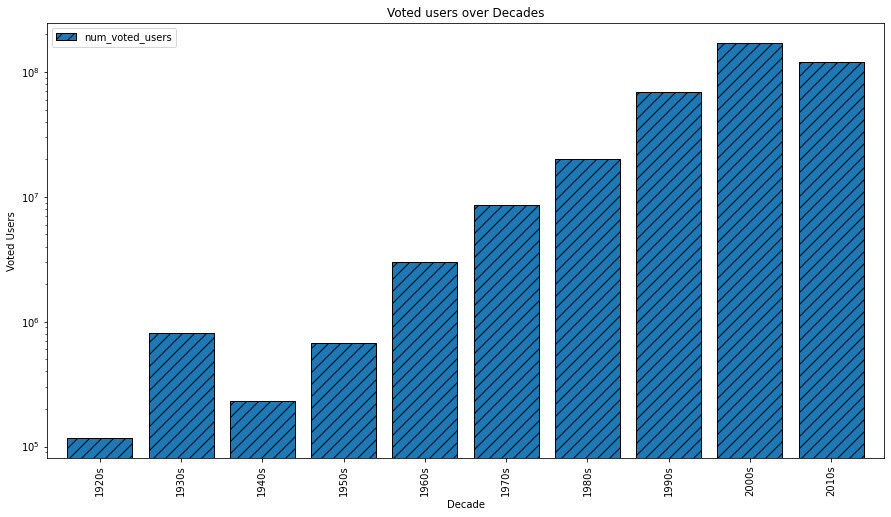

In [41]:
import matplotlib.pyplot as plt
df_by_decade.plot.bar(figsize=(15,8),width=0.8,hatch="//",edgecolor='k')
plt.xlabel("Decade")
plt.ylabel("Voted Users")
plt.title("Voted users over Decades")
plt.yscale('log')
plt.show()